# This script plots each trace individually and saves the best one(s) for future use (presentation, publication, etc)

In [2]:
# This script saves the first trace of each cell and store them in a csv file

import pyabf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns

In [139]:
# Pick a cell, stack the 1

myCell = '2022_03_15_0008.abf'

abf = pyabf.ABF(myCell)

num_sweep = len(abf.sweepList)

dur = 20  # sweep duration = 20 s
samp_rate = 10 * 1000  # sampling rate = 10 kHz

sweep_len = dur * samp_rate

stacked = np.zeros([num_sweep, sweep_len])  # Here 200000 comes from 20s x 10kHz sampling rate

for i in abf.sweepList:
    abf.setSweep(i, baseline = [0, 0.2])
    stacked[i, :] = abf.sweepY[0:sweep_len]
    
print("Total " + str(num_sweep) + ' sweeps.')

Total 4 sweeps.


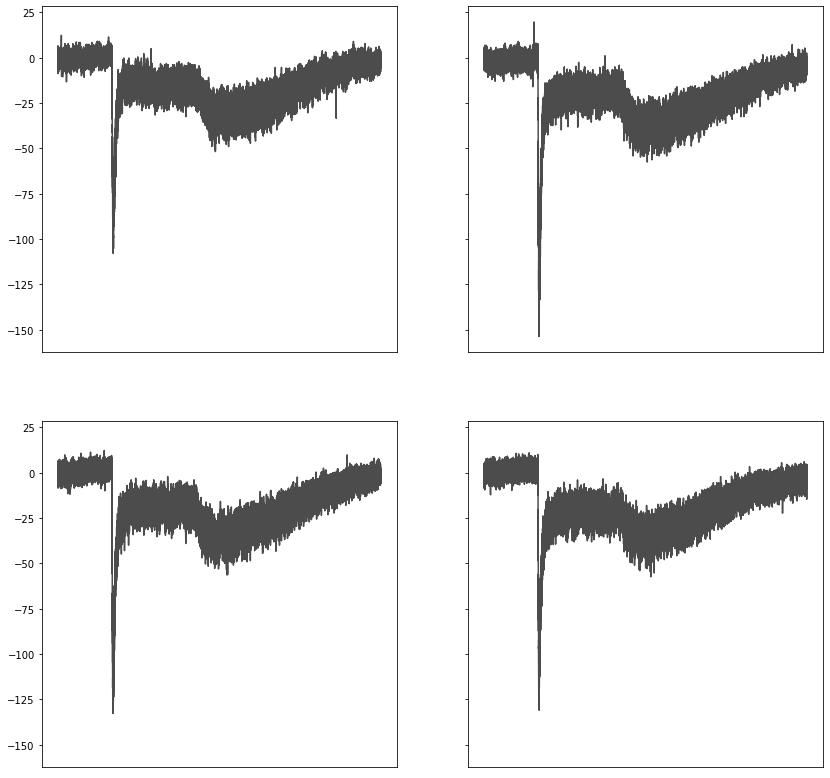

In [140]:
# Plot each trace in a 2x2 matrix, compare

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 14), sharey = True)
ax = axs.flatten() # Remember to make it a 1D array first 

for i in range(num_sweep):
    ax[i].plot(stacked[i, :], 'k', alpha = 0.7)
    ax[i].get_xaxis().set_visible(False)  # Hide the x-axis label because it's too busy
    
plt.show()

## Now pick the good trace(s), average over them, plot.

Text(0, 0.5, 'Current in pA')

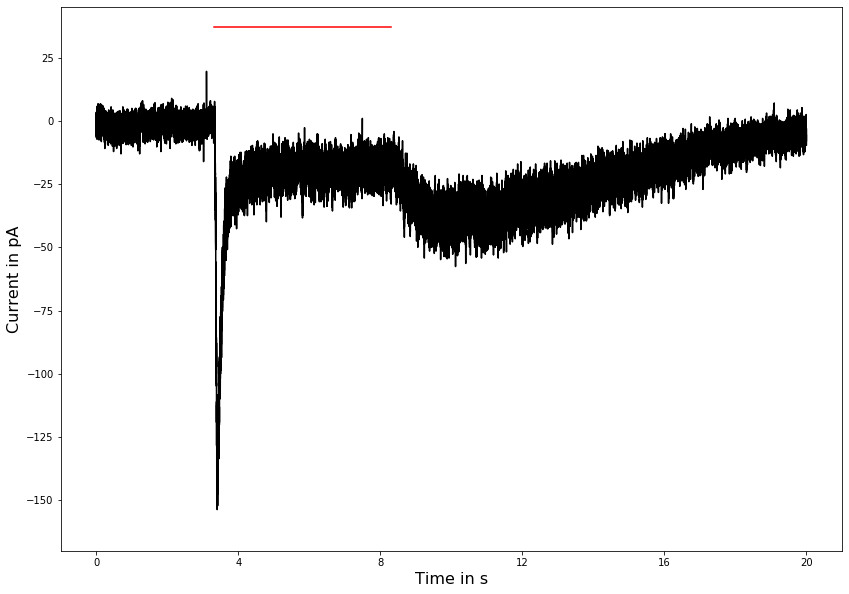

In [142]:
# keep = np.mean(stacked[1:2], axis = 0)
keep = stacked[1]
# Here use a bar to indicate where the puff begins and ends
bar_begin = 30000 + 3125
bar_end = bar_begin + 50000

fig = plt.figure(figsize = (14,10))
plt.plot(keep, color = 'k')

# plt.ylim(top = 20)
# plt.ylim(bottom = -120)
plt.plot((bar_begin, bar_end), (37, 37), 'r-')  # There's a 312.5 ms delay before the sweep starts
plt.xticks([0, 40000, 80000, 120000, 160000, 200000],
          [0, 4, 8, 12, 16, 20])
plt.ylim(top = 45)
plt.ylim(bottom = -170)
plt.xlabel('Time in s', fontsize = 16)
plt.ylabel('Current in pA', fontsize = 16)


## Save both the result (keep) and the final plot as jpg

In [143]:
import os
name = os.path.basename(myCell)

# Save keep using name
saveName = os.path.splitext(name)[0]  # Here strip the extension
np.savetxt(saveName, keep, delimiter = ',')

# Save plot
plotName = saveName + '.png'
fig.savefig(plotName, dpi = 700, bbox_inches = 'tight')